# Analysis and Prediction of Crimes in Chicago city

### Introduction

- The data we are analysing is from the Chicago Data Portal (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data) which provides us information about all the crimes that took place in the city of Chicago from 2001 to Present

- The questions we would be investigating and predicting are:
    1. The type of crime that can happen
    2. The place where a crime is likely to happen
    3. If the crime ends up in an arrest or not


### Any changes?

We initially planned to work with the entire dataset which has data from 2001 - Present. That is 7662271 rows (as of Nov 2 2022)
Currently, we would be working on a subset of the dataset i.e., from 2019 - 2021 which has 680425 rows (as of Nov 2 2022)

This is being done to fit the time frame of our project. In the subsequent days, we would incorporate the entire dataset to finetune our model better

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\syarla3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


### Data initialisation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
crimes_df = pd.read_csv('C:/Users/ksidda2/Downloads/Crimes-2019_to_2021.csv')
crimes_df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ksidda2/Downloads/Crimes-2019_to_2021.csv'

In [ ]:
crimes_df.shape

(680425, 22)

In [ ]:
crimes_df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

##### Meanings of columns

1. ID
2. Case Number: unique crime ID
3. Date: listed date of crime
4. Block: block where crime occured
5. IUCR: four digit Illinois Uniform Crime Reporting (IUCR) codes
6. Description: Short description of the type of crime
7. Location description: Description of where crime occured
8. Arrest: boolean value (T/F) of whether or not an arrest was made
9. Domestic: boolean value (T/V) of whether or not crime was domestic
10. Community Area: numeric value indicating area in community where crime occured
11. FBI Code: numeric code indicating FBI crime categorization
12. X & Y Coordinate: exact location where crime occured
13. Year: Year crime occured
14. Updated On: Date and time the crime was added
15. Latitude & Longitude: latitude and longitude information of crime

In [ ]:
crimes_df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,6.804250e+05,680425.000000,680425.000000,680390.000000,680424.000000,6.700100e+05,6.700100e+05,680425.000000,670010.000000,670010.000000
mean,1.203044e+07,1144.239909,11.213443,23.158710,37.023681,1.165010e+06,1.885805e+06,2019.920945,41.842237,-87.669997
std,7.293762e+05,696.647654,6.960818,13.860697,21.524839,1.643301e+04,3.179020e+04,0.826003,0.087434,0.059767
min,2.436800e+04,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2019.000000,36.619446,-91.686566
25%,1.180749e+07,611.000000,6.000000,10.000000,23.000000,1.153214e+06,1.858326e+06,2019.000000,41.766592,-87.712759
50%,1.206204e+07,1024.000000,10.000000,24.000000,32.000000,1.166831e+06,1.892082e+06,2020.000000,41.859643,-87.663555
75%,1.232259e+07,1713.000000,17.000000,34.000000,54.000000,1.176661e+06,1.908536e+06,2021.000000,41.904674,-87.627420
max,1.287802e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951527e+06,2021.000000,42.022586,-87.524529


### Data cleaning

Converting the column names to a standard form and handling inconsistencies

In [ ]:
crimes_df.columns = crimes_df.columns.str.strip()
crimes_df.columns = crimes_df.columns.str.replace(' ', '_')
crimes_df.columns = crimes_df.columns.str.lower()

- ID, Case Number are primary key attributes and do not add value. These columns can be dropped
- We have attributes: Latitude, Longitude and Location where Location is the combination of Latitude & Longitude data (Latitude,Longitude). So Location column is redundant and can be dropped

In [ ]:
crimes_df.drop(['id','case_number','location'], axis = 1, inplace = True)

Checking if there are any null values

In [ ]:
crimes_df.isna().sum()

date                        0
block                       0
iucr                        0
primary_type                0
description                 0
location_description     3370
arrest                      0
domestic                    0
beat                        0
district                    0
ward                       35
community_area              1
fbi_code                    0
x_coordinate            10415
y_coordinate            10415
year                        0
updated_on                  0
latitude                10415
longitude               10415
dtype: int64

- Since latitude, longitude, ward are crucial information to detect the location of crime, missing information for these do not contribute much to the dataset. So, we can drop these columns
- Location description is not a mandatory column and would not affect our model. So, we don't have to delete it. We can replace missing values with 'Unavailable'

In [ ]:
crimes_df.dropna(subset = ['latitude','longitude','ward'], inplace = True)
crimes_df.reset_index(drop = True, inplace = True)
crimes_df['location_description'] = crimes_df['location_description'].fillna('Unavailable')

In [ ]:
crimes_df.isna().sum()

date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
updated_on              0
latitude                0
longitude               0
dtype: int64

In [ ]:
crimes_df.shape

(669975, 19)

We removed 3 columns and (207351 - 202375 = 4976) 4976 rows. This constitutes to 2.3% of the initial dataset. Since, the value is very low we wouldn't have missed out on important insights

### Data cleaning

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation Table

In [ ]:
#Correlation Table to show relation among columns
crimes_df.corr()

C:\Users\ksidda2\AppData\Local\Temp\ipykernel_3932\52526804.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crimes_df.corr()


,arrest,domestic,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
arrest,1.000000,-0.035655,-0.029982,-0.030081,-0.015942,0.020067,-0.030183,-0.026545,-0.103488,-0.026367,-0.030849
domestic,-0.035655,1.000000,-0.064945,-0.064987,-0.083116,0.103331,0.018178,-0.119389,0.055577,-0.119200,0.016471
beat,-0.029982,-0.064945,1.000000,0.999768,0.644717,-0.485691,-0.545096,0.632063,0.007650,0.632803,-0.540429
district,-0.030081,-0.064987,0.999768,1.000000,0.645827,-0.486093,-0.546212,0.633214,0.007659,0.633956,-0.541537
ward,-0.015942,-0.083116,0.644717,0.645827,1.000000,-0.514102,-0.472331,0.659889,-0.007436,0.660274,-0.466554
community_area,0.020067,0.103331,-0.485691,-0.486093,-0.514102,1.000000,0.250804,-0.765967,0.011302,-0.765234,0.241458
x_coordinate,-0.030183,0.018178,-0.545096,-0.546212,-0.472331,0.250804,1.000000,-0.533329,-0.000492,-0.535863,0.999898
y_coordinate,-0.026545,-0.119389,0.632063,0.633214,0.659889,-0.765967,-0.533329,1.000000,-0.007829,0.999995,-0.523842
year,-0.103488,0.055577,0.007650,0.007659,-0.007436,0.011302,-0.000492,-0.007829,1.000000,-0.007811,-0.000661
latitude,-0.026367,-0.119200,0.632803,0.633956,0.660274,-0.765234,-0.535863,0.999995,-0.007811,1.000000,-0.526405


### Visualize amount of crimes according to their type

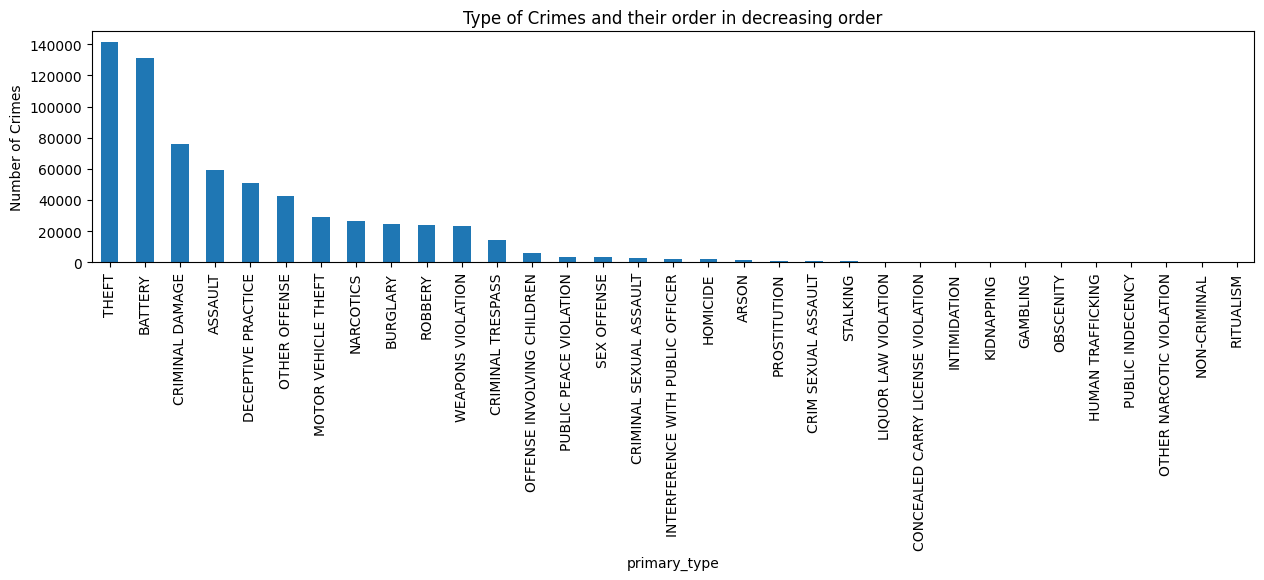

In [ ]:
#Visualize amount of crimes according to their type
plt.figure(figsize=(15,3))
plt.title('Type of Crimes and their order in decreasing order')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Type')

crimes_df.groupby([crimes_df['primary_type']]).size().sort_values(ascending=False).plot(kind='bar')

plt.show()

### Observation : We see that theft is the highest type of crime occuring among all other types.

### Visualize amount of crimes by location of crime. We take highest 20 records.

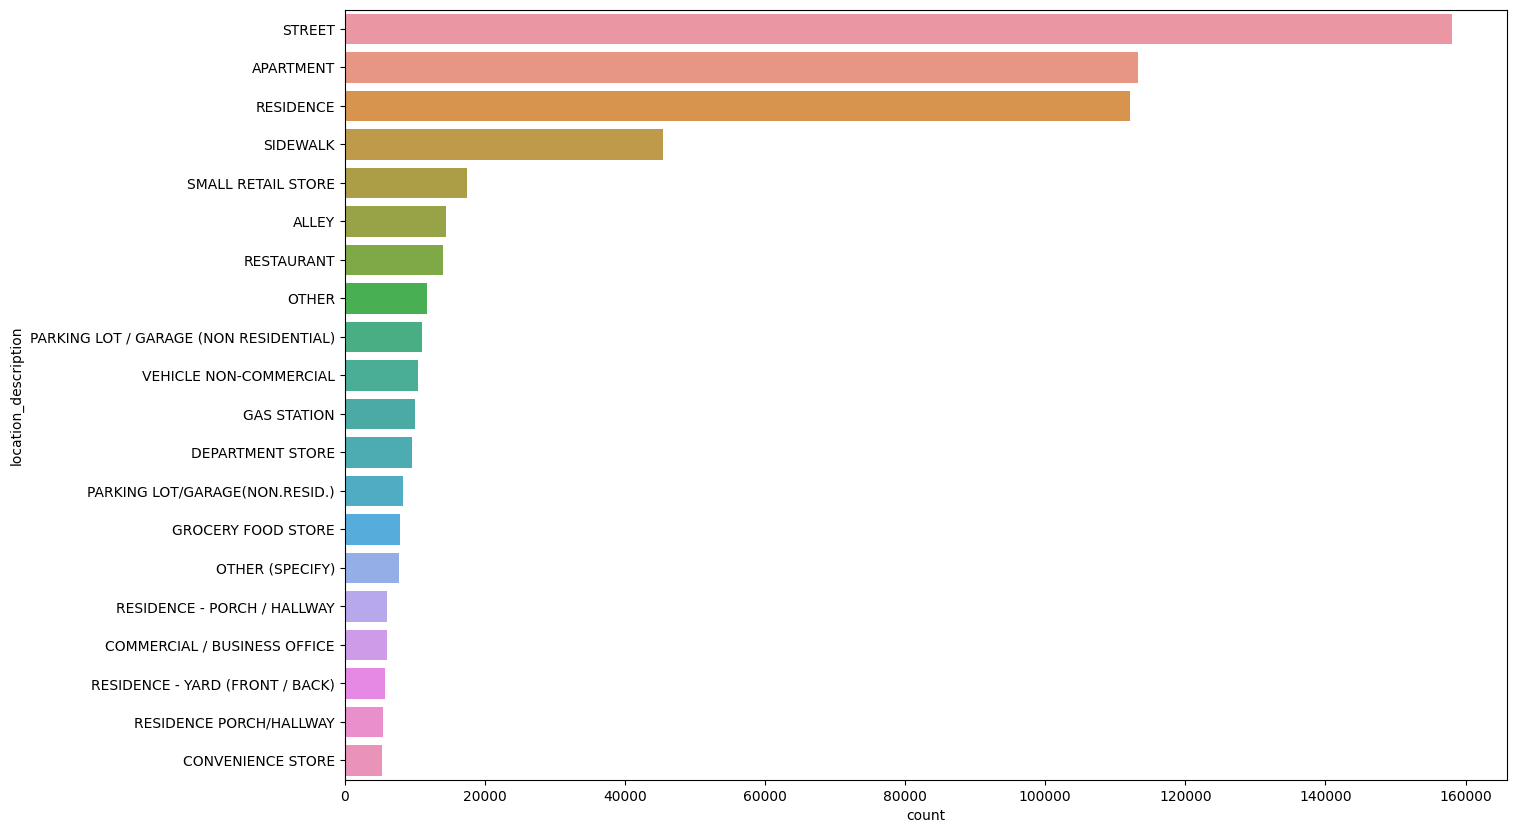

In [ ]:
#Visualize amount of crimes by location of crime. We take highest 20
plt.figure(figsize = (15, 10))
sns.countplot(y = 'location_description', 
              data = crimes_df, 
              order = crimes_df['location_description'].value_counts().iloc[:20].index)

plt.show()

### Observation : Most of the crimes occur in Streets

In [ ]:
pip install sklearn

  DEPRECATION: sklearn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.6/7.6 MB 7.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00
     --------------------------------------- 40.2/40.2 MB 10.2 MB/s eta 0:00:00
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


### Visualization of crimes accross districts

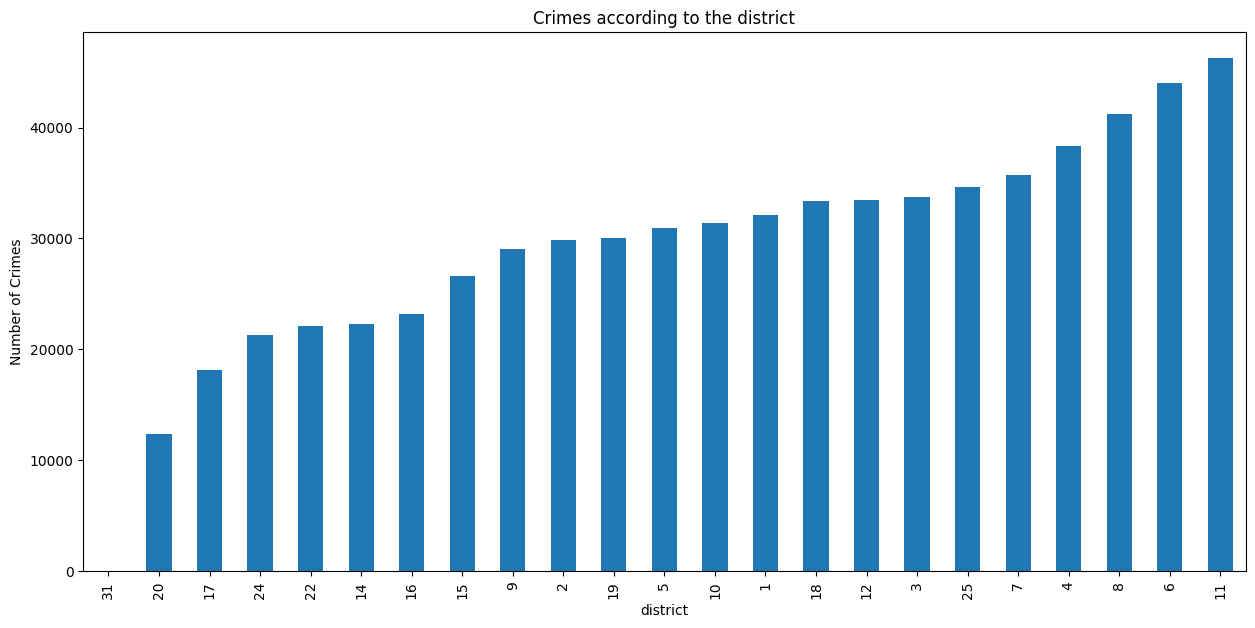

In [ ]:
#Visualization of crimes accross districts
plt.figure(figsize=(15,7))
plt.title('Crimes according to the district')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Type')

crimes_df.groupby([crimes_df['district']]).size().sort_values(ascending=True).plot(kind='bar')

plt.show()

### Observation: Here we see most crimes are occurring in district 11 and least in 31

### Grouping the seasons based on month

<AxesSubplot: xlabel='season', ylabel='count'>

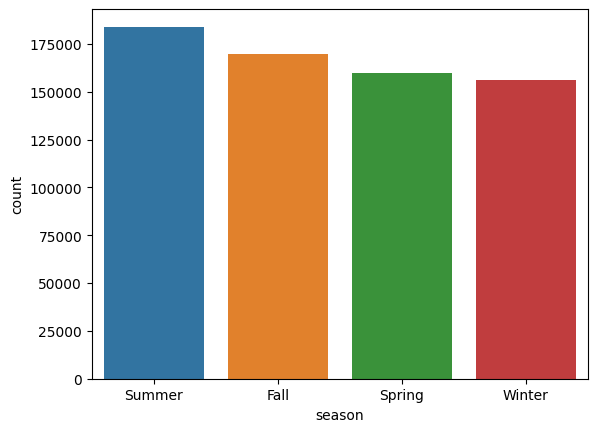

In [ ]:
#Grouping the seasons based on month
crimes_df.date = pd.to_datetime(crimes_df.date)
crimes_df['month'] = crimes_df.date.dt.month_name()

group_season = {
    ('June','July','August') : 'Summer',
    ('September','October','November') : 'Fall',
    ('March','April','May') : 'Spring',
    ('December','January','February') : 'Winter'
}

season_dict = {}
for keys, values in group_season.items():
    for key in keys:
        season_dict[key] = values
        
crimes_df['season'] = crimes_df.month.map(season_dict)
sns.countplot(data=crimes_df, x='season', order=crimes_df.season.value_counts().index)

### Observation: Summer has most crime rate but seasons does not effect crimes much.

### Plot crimes according to the year.

<AxesSubplot: xlabel='count', ylabel='year'>

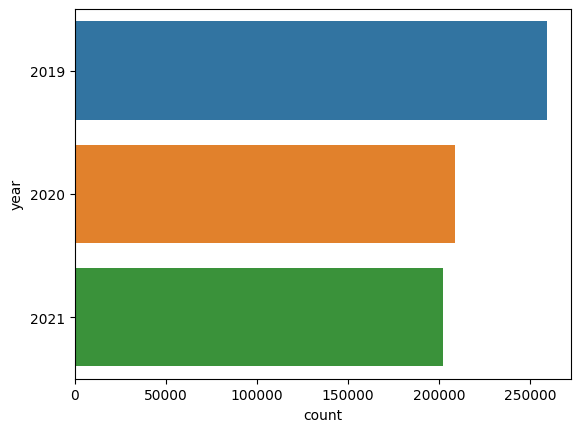

In [ ]:
#Plot crimes according to the year.
sns.countplot(y = 'year', data =crimes_df, order = pd.value_counts(crimes_df['year']).iloc[:3].index)

### Observation : 2019 has highest crime rate

### Count of crimes according to block

<AxesSubplot: xlabel='count', ylabel='block'>

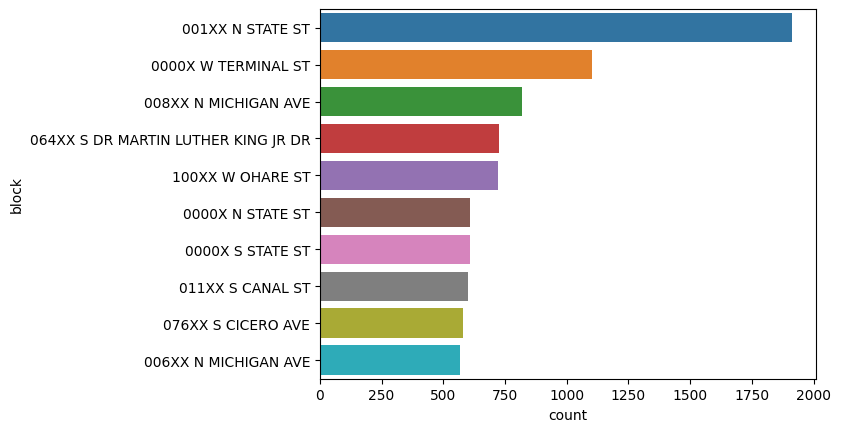

In [ ]:
#Count of crimes according to block
sns.countplot(y = 'block', data = crimes_df, order = pd.value_counts(crimes_df['block']).iloc[:10].index)


### Observation : 001XX N State St has highest crime rate

### Hypothesis Testing
### Around 75 communities have registered cases relating to domestic violence.

In [ ]:
domestic_data = crimes_df.loc[crimes_df['domestic'] == True] 

In [ ]:
domestic_data.groupby('community_area').size()

community_area
1.0     1595
2.0     1470
3.0     1142
4.0      563
5.0      234
        ... 
73.0    1844
74.0     250
75.0    1104
76.0     329
77.0     759
Length: 77, dtype: int64

In [ ]:
print('Total communities which have registered cases relating to domestic violence :', domestic_data.groupby('community_area').size().count())

Communities which have registered cases relating to domestic violence : 77


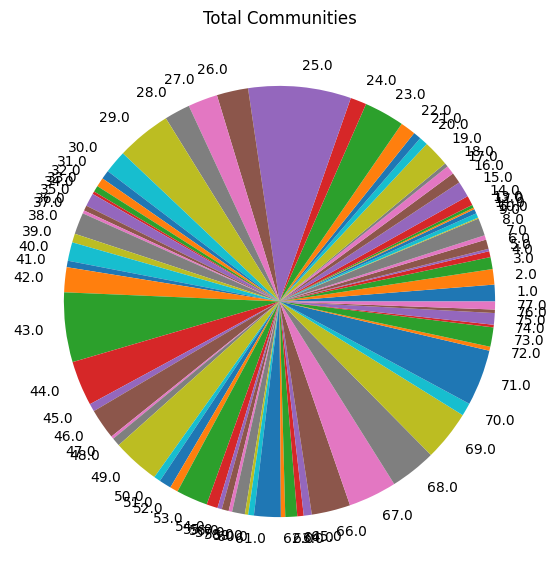

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Total Communities')
plt.ylabel('Domestic data')
domestic_data.groupby('community_area').size().plot(kind='pie')
plt.show()

### Model building

### Making prediction to find whether arrested or not.

We convert the numercial attributes to categorical attributes to improve the signal-to-noise ratio.

In [ ]:
#Converting the numercial attributes to categorical attributes
crimes_df.year = pd.Categorical(crimes_df.year)
crimes_df.domestic = pd.Categorical(crimes_df.domestic)
crimes_df.arrest = pd.Categorical(crimes_df.arrest)
crimes_df.beat = pd.Categorical(crimes_df.beat)
crimes_df.district = pd.Categorical(crimes_df.district)
crimes_df.ward = pd.Categorical(crimes_df.ward)
crimes_df.community_area = pd.Categorical(crimes_df.community_area)

As date,block,iucr,primary_type,description,location_description,fbi_code,updated_on,x_coordinate,y_coordinate donot make impact on arrest_True. 

In [ ]:
#Droping the attributes date,block,iucr,primary_type,description,location_description,fbi_code,updated_on,x_coordinate,y_coordinate.
crimes_dff = crimes_df.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate'],axis = 1)

In [ ]:
crimes_dff.head()

Removing dummy values

In [ ]:
crimes_dff = pd.get_dummies(crimes_dff,drop_first=True)


In [ ]:
crimes_dff.head()

In [ ]:
#Train test spliting the data with test size 30%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(crimes_dff.drop(['arrest_True'],axis=1),crimes_dff['arrest_True'], test_size=0.3,random_state=0)

We Standardize the data as data have varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution.

In [ ]:
#Standardizing the data
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

### Using Gaussain Naive Bayes

In [ ]:
#predicting 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Confusion_matrix on the prediction we made.

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

Using seaborn and matplotlib to visualize the confusion matrix for better understanding.

In [ ]:
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

Classification report and accuracy.

In [ ]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

In [ ]:
### Visualization of Hypothesis